In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## スタンド

### 時刻別消費電力量
$$
E_{ Elc, desk-lamp, d, t } =  P_{ Elc, desk-lamp } \times t_{ desk-lamp, d, t } \times 10^{ -3 }
$$

$ E_{ Elc, desk-lamp, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, desk-lamp, oprt } $：点灯時の消費電力,W  
$ t_{ desk-lamp, oprt, d, t } $：日付dの時刻tにおける点灯時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_desk_lamp_d_t(P_Elc_desk_lamp_rtd, t_desk_lamp_oprt_d_t):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_desk_lamp_rtd : float
        定格消費電力, W
        
    t_desk_lamp_oprt_d_t : ndarray(N-dimensional array)
        1年間の全時間の点灯時間を格納したND配列, h
        d日t時の点灯時間が年開始時から8760個連続して格納されている
        
    Returns
    ----------
    E_Elc_desk_lamp_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, kWh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_desk_lamp_oprt = get_P_Elc_desk_lamp_oprt(P_Elc_desk_lamp_rtd)
    
    E_Elc_desk_lamp_d_t = P_Elc_desk_lamp_oprt * t_desk_lamp_oprt_d_t
    E_Elc_desk_lamp_d_t = E_Elc_desk_lamp_d_t * 10**(-3)
    
    return E_Elc_desk_lamp_d_t

### 動作別の消費電力

#### 点灯時の消費電力  
$$
P_{ Elc, desk-lamp, oprt } =　1.07 \times P_{ Elc, desk-lamp, rtd }
$$

$ P_{ Elc, desk_lamp, rtd } $：定格消費電力,W

In [3]:
def get_P_Elc_desk_lamp_oprt(P_Elc_desk_lamp_rtd):
    """点灯時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_desk_lamp_rtd : float
        定格消費電力, W
        
    Returns
    ----------
    P_Elc_desk_lamp_oprt : float
        使用時の消費電力, W
    """
    
    P_Elc_desk_lamp_oprt = 1.07 * P_Elc_desk_lamp_rtd
        
    return P_Elc_desk_lamp_oprt

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [4]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['スタンド_4人世帯_点灯']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

#### 調理時の消費電力

In [5]:
get_P_Elc_desk_lamp_oprt(20)

21.400000000000002

### 時刻別消費電力量

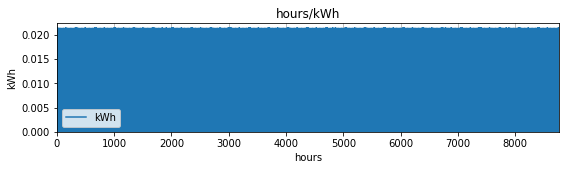

In [6]:
t_desk_lamp_oprt_d_t = import_schedule_1_d_t()

x = np.arange(8760)
y = get_E_Elc_desk_lamp_d_t(20, t_desk_lamp_oprt_d_t)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [7]:
t_desk_lamp_oprt_d_t = import_schedule_1_d_t()

dat = get_E_Elc_desk_lamp_d_t(20, t_desk_lamp_oprt_d_t)

np.savetxt('tmp.csv',dat,delimiter=',',fmt = " %s ")